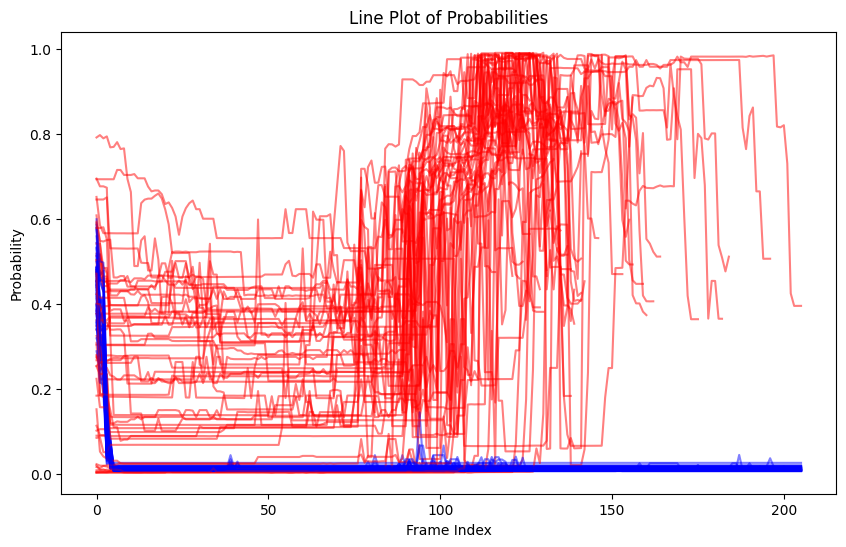

In [5]:
import ast
import matplotlib.pyplot as plt
import pandas as pd

csv_path = '/home/lgeng/BAKU/baku/exp_local/eval/2024.07.28_supervised_eval/deterministic/232109_hidden_dim_256/probs.csv'
# Great one: /home/lgeng/BAKU/baku/exp_local/eval/2024.07.17_supervised_eval/deterministic/121829_hidden_dim_256/probs.csv
data = pd.read_csv(csv_path)
# Convert the 'Probs' column from string representation of lists to actual lists
data['Probs'] = data['Probs'].apply(ast.literal_eval)

# Create a line plot
plt.figure(figsize=(10, 6))

# Plot each row in the 'Probs' column
for idx, row in data.iterrows():
    # if row['Labels'] == 0:
        color = 'blue' if row['Labels'] == 0 else 'red'
        plt.plot(row['Probs'], color=color, alpha=0.5, label='{}'.format("success" if row['Labels'] == 1 else "failure"))

plt.xlabel('Frame Index')
plt.ylabel('Probability')
plt.title('Line Plot of Probabilities')
plt.show()


In [4]:
len(data['Probs'][10])

126

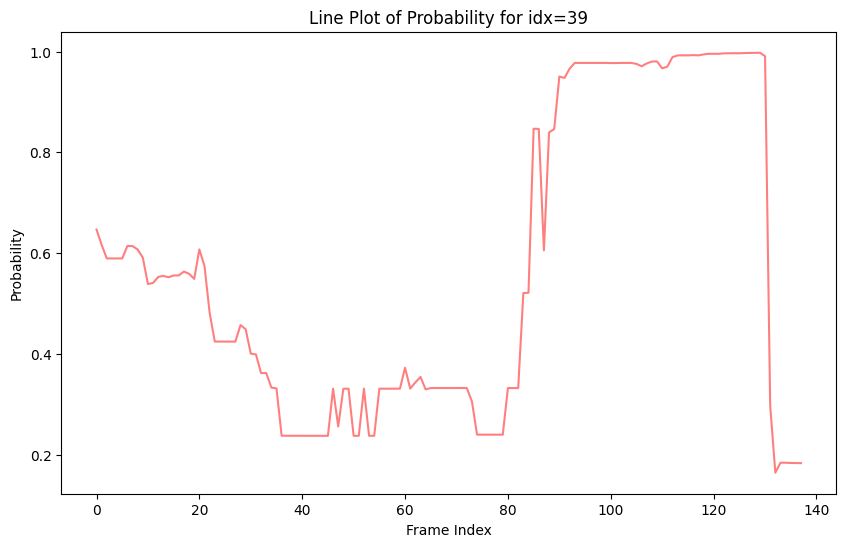

In [66]:
# Create a line plot
plt.figure(figsize=(10, 6))

idx = 39
# Plot each row in the 'Probs' column
row = data.iloc[idx]
color = 'blue' if row['Labels'] == 0 else 'red'
plt.plot(row['Probs'], color=color, alpha=0.5, label='{}'.format("success" if row['Labels'] == 1 else "failure"))

plt.xlabel('Frame Index')
plt.ylabel('Probability')
plt.title('Line Plot of Probability for idx={}'.format(idx))
plt.show()

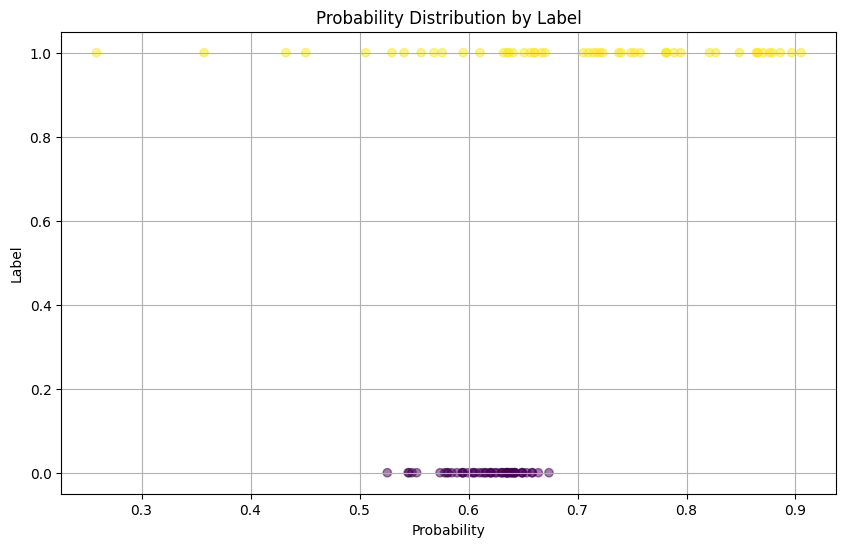

In [9]:
import ast
import matplotlib.pyplot as plt
import pandas as pd

csv_path = '/home/lgeng/BAKU/baku/exp_local/eval/2024.07.08_supervised_eval/deterministic/193426_hidden_dim_256/probs.csv'
data = pd.read_csv(csv_path)
# Convert the 'Probs' column from string representation of lists to actual lists
# data['Probs'] = data['Probs'].apply(ast.literal_eval)
# Extract probabilities (removing brackets) and labels
data['Probs'] = data['Probs'].apply(lambda x: float(x[1:-1]))

# Create a line plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Probs'], data['Labels'], c=data['Labels'], cmap='viridis', alpha=0.5)
plt.title('Probability Distribution by Label')
plt.xlabel('Probability')
plt.ylabel('Label')
plt.grid(True)
plt.show()


In [ ]:
from moviepy.editor import VideoFileClip, TextClip, CompositeVideoClip

# Load your video
video = VideoFileClip("input_video.mp4")

def make_text_clip(t):
    # Create a text clip with the current second
    txt = TextClip(f"{int(t)}", fontsize=70, color='white', bg_color='black')
    # Set the duration of the text clip to 1 second
    txt = txt.set_duration(1)
    # Position the text in the center of the screen
    return txt.set_pos(('center', 'center'))

# Create a text clip for each second of the video
txt_clips = [make_text_clip(t).set_start(t) for t in range(int(video.duration))]

# Overlay the text clips on the original video
result = CompositeVideoClip([video] + txt_clips)

# Write the result to a file
result.write_videofile("output_video.mp4", codec='libx264')
